In [1]:
import pmdarima as pm
import pandas as pd
from random import sample, choice
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.DataFrame(pm.datasets.load_gasoline(), columns=['gasoline'])

In [3]:
dataset['exog1'] = dataset.shift(-2)/100

In [4]:
dataset['exog1'][-2:] = [93.05, 93.88]

In [5]:
dataset['exog2'] = abs(np.random.randn(dataset.shape[0]))

In [6]:
dataset.head()

,gasoline,exog1,exog2
0,6621.0,65.82,1.005207
1,6433.0,72.24,0.039158
2,6582.0,68.75,0.919656
3,7224.0,69.47,1.107705
4,6875.0,73.28,0.614470


In [7]:
dataset.corr()

,gasoline,exog1,exog2
gasoline,1.000000,0.838285,-0.021224
exog1,0.838285,1.000000,-0.019725
exog2,-0.021224,-0.019725,1.000000


In [8]:
dataset.shape

(745, 3)

In [9]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rc('figure', figsize=(16,12))

In [10]:
#series = pd.Series(dataset['gasoline'])
dataset.index = pd.date_range("02-01-1991",periods=len(dataset),freq='W')
stl = STL(dataset['gasoline'], seasonal=53)
#stl = STL(dataset['gasoline'], period=745, seasonal=53)

In [11]:
stlfit = stl.fit()

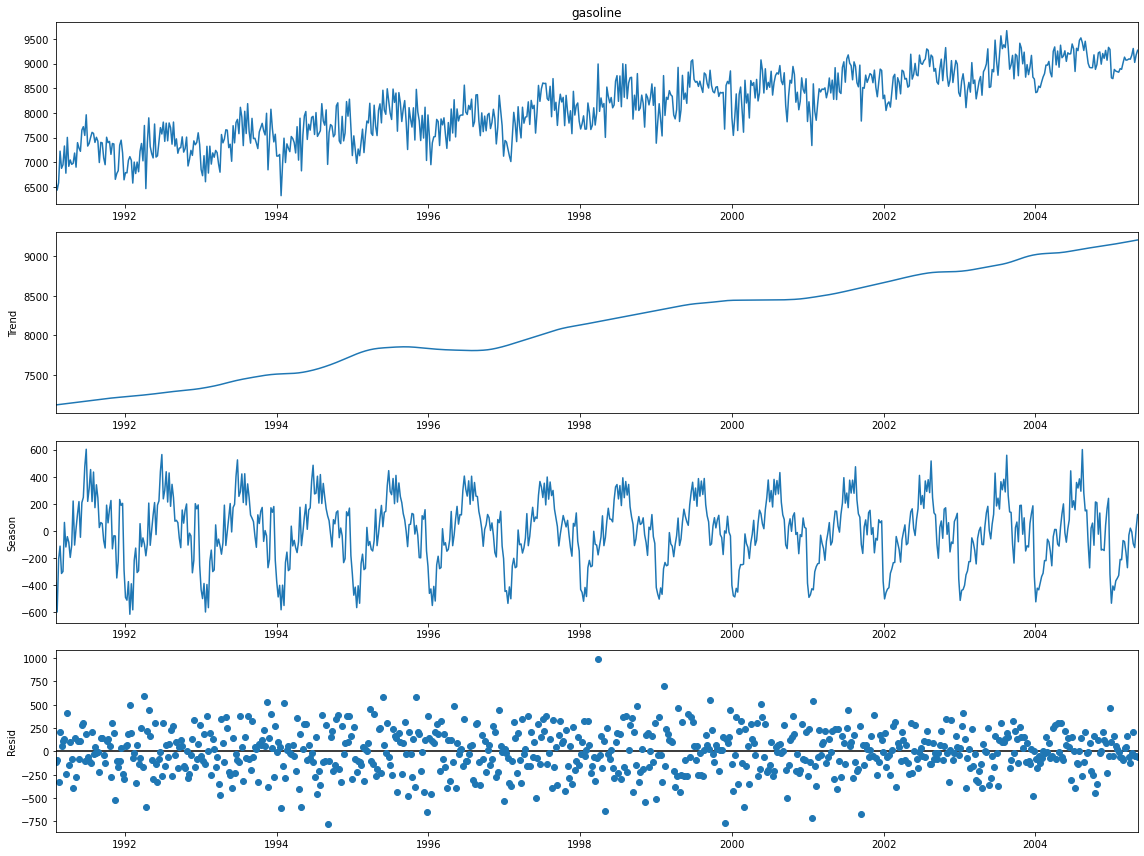

In [12]:
stlfit.plot()
plt.show()

In [13]:
# sres = seasonal_decompose(dataset['gasoline'], period=53)
# sres.plot()
# plt.show()

In [14]:
kpss_res = kpss(dataset['gasoline'], nlags='auto', regression='c')
adf_res = adfuller(dataset['gasoline'],regression='c')
print(kpss_res[1], adf_res[1])
sr_diff = dataset['gasoline']-dataset['gasoline'].shift(1)
kpss_res = kpss(sr_diff.dropna(), nlags='auto', regression='c')
adf_res = adfuller(sr_diff.dropna(), regression='c')
print(kpss_res[1], adf_res[1])

0.01 0.348160899739101
0.1 7.231136721885619e-27


/Users/fahadktk/miniconda3/envs/tseries/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/fahadktk/miniconda3/envs/tseries/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


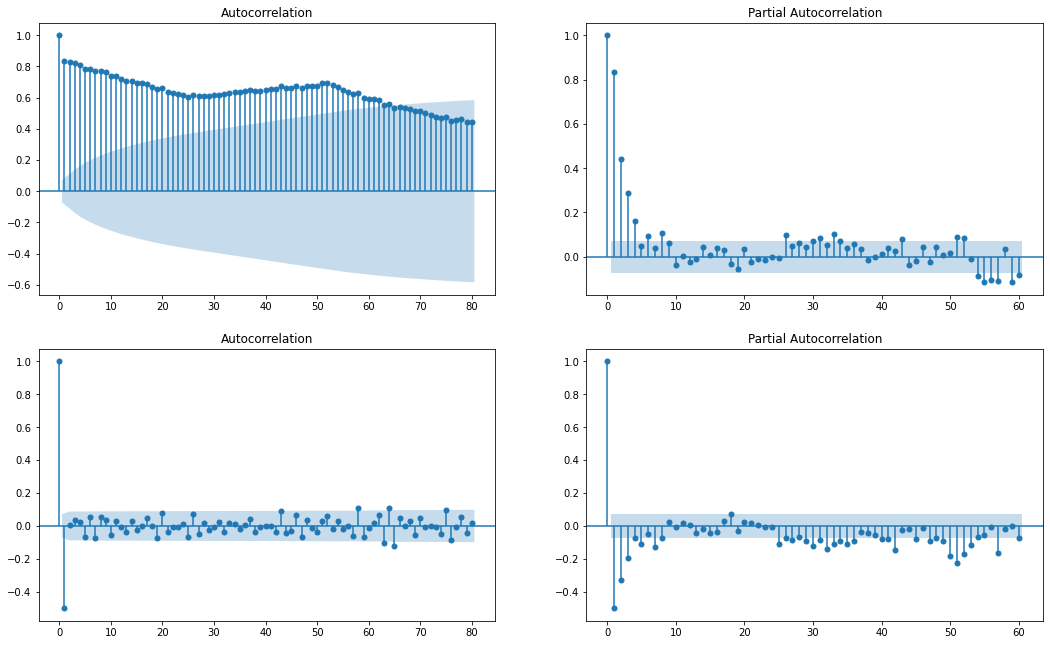

In [15]:
fig, axes = plt.subplots(2,2)
fig.set_figwidth(18)
fig.set_figheight(11)
plot_acf(dataset['gasoline'], lags=80, ax=axes[0,0])
plot_pacf(dataset['gasoline'], lags=60, ax=axes[0,1])
plot_acf(sr_diff.interpolate(limit_direction='both'), lags=80, ax=axes[1,0])
plot_pacf(sr_diff.interpolate(limit_direction='both'), lags=60, ax=axes[1,1])
plt.show()

In [16]:
import sys
sys.path.insert(0, '../')

In [17]:
from armadl import ARMADL

In [18]:
mdl = ARMADL(dataset['gasoline'][:4*52], exog=dataset[['exog1','exog2']][:4*52], 
             dl_param=0) #dl_param={'exog1':[1,2], 'exog2':2})

In [23]:
auto_arima_params = dict(start_p=0, start_q=0, with_intercept=True,
                       test='adf', trace=True, stepwise=False, seasonal=True, out_of_sample_size=52,
                       scoring='mse', m=52, maxiter=5)

In [24]:
endog = dataset['gasoline']
exog = dataset[['exog1','exog2']]

In [25]:
mdl.exog

,exog1,exog2
1991-02-03,65.82,1.005207
1991-02-10,72.24,0.039158
1991-02-17,68.75,0.919656
1991-02-24,69.47,1.107705
1991-03-03,73.28,0.614470
...,...,...
1994-12-25,75.34,1.169122
1995-01-01,72.60,1.483958
1995-01-08,69.76,0.291265
1995-01-15,72.67,1.559287


In [26]:
res = mdl.model_selection(strategy='split', train_size=3*52, **auto_arima_params)

 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2269.161, Time=0.09 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=2311.908, Time=0.62 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=2313.615, Time=2.80 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=2311.890, Time=0.65 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=2313.870, Time=0.84 sec
 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=2315.611, Time=2.97 sec
 ARIMA(0,0,0)(2,0,0)[52] intercept   : AIC=2313.590, Time=2.73 sec
 ARIMA(0,0,0)(2,0,1)[52] intercept   : AIC=2315.590, Time=3.31 sec
 ARIMA(0,0,0)(2,0,2)[52] intercept   : AIC=2317.595, Time=5.91 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2312.345, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2314.285, Time=0.72 sec
 ARIMA(0,0,1)(0,0,2)[52] intercept   : AIC=2316.026, Time=4.24 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=2314.266, Time=1.04 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=2316.274, Time=1.05 sec
 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=2318.020, Time=4.60

In [27]:
mdl.exog.shape

(208, 2)

In [31]:
skm.mean_absolute_percentage_error(res[2], res[3])

0.044920278109607775

In [84]:
fit_res.seasonal_order

(0, 0, 1, 52)

In [70]:
fit_res = mdl.fit_res[0]

In [95]:
fit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 52)   Log Likelihood               -1122.014
Date:                            Wed, 15 Sep 2021   AIC                           2256.028
Time:                                    00:59:48   BIC                           2274.328
Sample:                                         0   HQIC                          2263.461
                                            - 156                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5553.1914    626.853      8.859      0.000    4324.582    6781.800
x1            23.9817      8.385      2.860      0.004       7.547      40.417
x2             2.9460     48.879      0.060      0.952     -92.855      98.747
ma.L1          0.2497      0.084      2.989      0.003       0.086       0.413
ma.S.L52       0.1682      0.109      1.538      0.124      -0.046       0.383
sigma2       1.04e+05   1.14e+04      9.146      0.000    8.17e+04    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.50
Prob(Q):                              0.98   Prob(JB):                         0.17
Heteroskedasticity (H):               1.41   Skew:                            -0.25
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

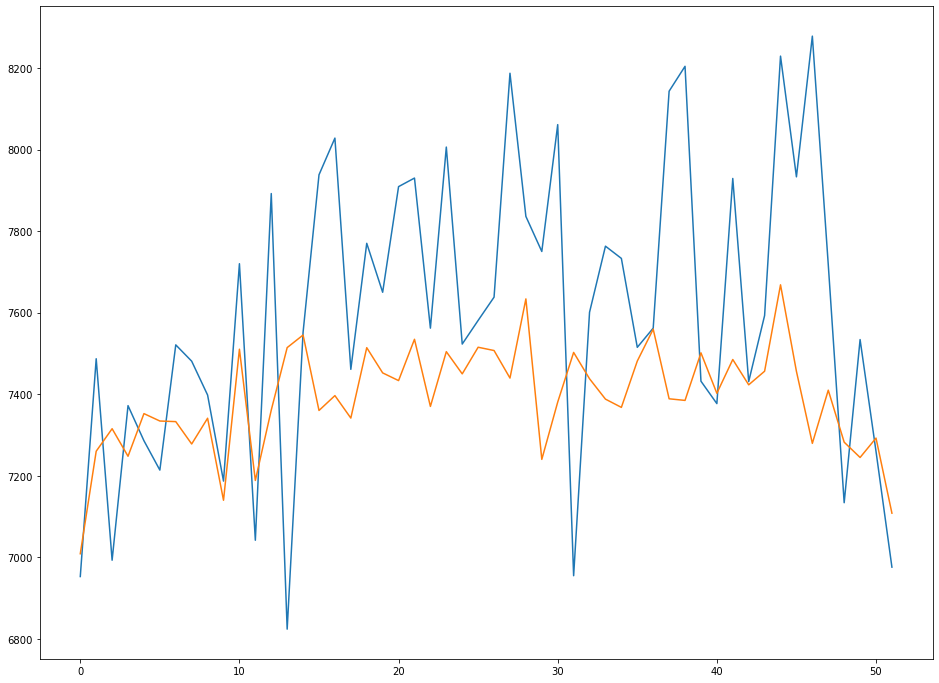

In [121]:
plt.plot(dataset['gasoline'][3*52:4*52].values)
plt.plot(fit_res.predict(n_periods=1*52, X=dataset[['exog1','exog2']][3*52:4*52]))

In [122]:
skm.mean_absolute_percentage_error(dataset['gasoline'][3*52:4*52], fit_res.predict(n_periods=1*52, X=dataset[['exog1','exog2']][3*52:4*52]))

0.03826986018232308

In [44]:
dataset[['exog1','exog2']][:3*52].shape[0]

156

In [85]:
bestparams = list(fit_res.order) + [fit_res.seasonal_order[-1]]

In [96]:
bestparams

[0, 0, 1, 52]

In [97]:
model = SARIMAX(dataset['gasoline'][:3*52], exog=dataset[['exog1','exog2']][:3*52], 
                order=fit_res.order, seasonal_order=fit_res.seasonal_order)

In [98]:
modelres = model.fit()

/Users/fahadktk/miniconda3/envs/tseries/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37203D+00    |proj g|=  4.03359D-03

At iterate    5    f=  7.37200D+00    |proj g|=  1.37111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     10      1     0     0   4.170D-05   7.372D+00
  F =   7.3720002582041531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [99]:
modelres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           gasoline   No. Observations:                  156
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 52)   Log Likelihood               -1150.032
Date:                            Wed, 15 Sep 2021   AIC                           2310.064
Time:                                    01:02:21   BIC                           2325.313
Sample:                                02-03-1991   HQIC                          2316.258
                                     - 01-23-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog1         99.0393      0.685    144.566      0.000      97.697     100.382
exog2         68.1783     54.634      1.248      0.212     -38.902     175.259
ma.L1          0.0162      0.093      0.173      0.863      -0.167       0.199
ma.S.L52       0.0077      0.139      0.055      0.956      -0.265       0.280
sigma2      1.467e+05   1.51e+04      9.715      0.000    1.17e+05    1.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.93   Prob(JB):                         0.03
Heteroskedasticity (H):               1.38   Skew:                            -0.26
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
trainRes = modelres.predict(dynamic=False, exog=dataset[['exog1','exog2']][:3*52])

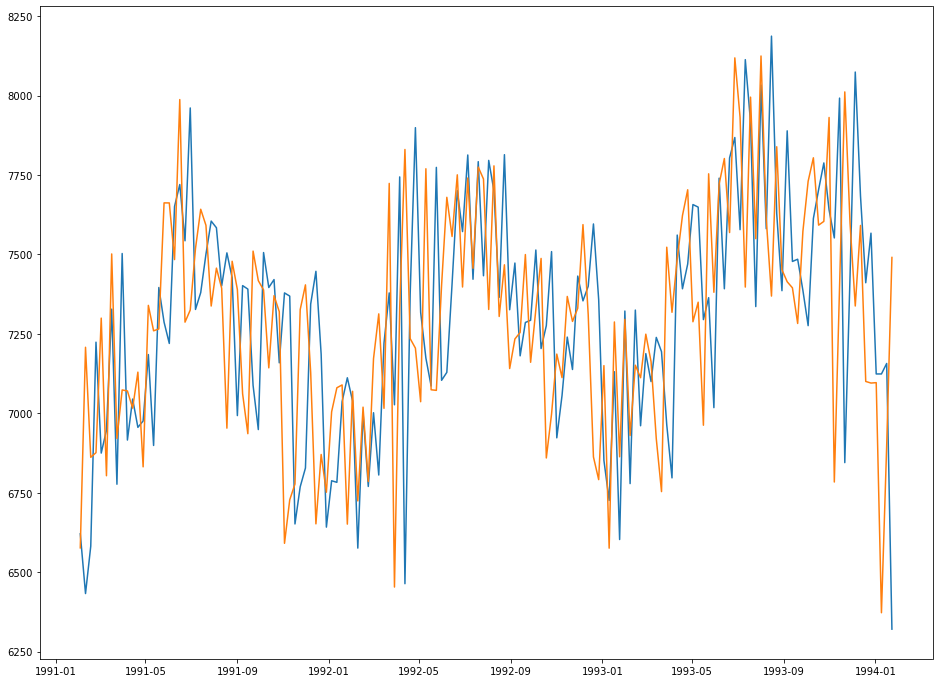

In [104]:
plt.plot(dataset['gasoline'][:3*52])
plt.plot(trainRes[0:])

In [117]:
skm.mean_absolute_percentage_error(dataset['gasoline'][1*52:3*52], trainRes[1*52:])

0.04105721276287522

### Without Exogenous Variables

In [29]:
import warnings
import sklearn.metrics as skm
warnings.filterwarnings('ignore')

In [158]:
dataset['gasoline'].shape[0]/52

14.326923076923077

In [165]:
fit_res = pm.auto_arima(dataset['gasoline'][:3*52], start_p=0, start_q=0, with_intercept=True,
                       test='adf', trace=True, stepwise=False, seasonal=True, out_of_sample_size=52,
                       scoring='mse', m=52)

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2290.139, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=2293.582, Time=1.01 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=2294.548, Time=3.75 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=2293.541, Time=0.77 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=2294.835, Time=0.83 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=2296.470, Time=4.31 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=2294.522, Time=3.52 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=2296.687, Time=5.54 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=2298.723, Time=4.59 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=2229.446, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2230.167, Time=1.01 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=inf, Time=6.33 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=2229.905, Time=1.01 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=8.60 sec
 ARIMA(0,1

In [184]:
bestparams = list(fit_res.order) + [fit_res.seasonal_order[-1]]

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [186]:
model = SARIMAX(dataset['gasoline'][:3*52], seasonal_order=bestparams)

In [187]:
modelres = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92289D+00    |proj g|=  1.01152D-01

At iterate    5    f=  4.92108D+00    |proj g|=  1.14196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.142D-05   4.921D+00
  F =   4.9210848526678364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [188]:
modelres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             gasoline   No. Observations:                  156
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 52)   Log Likelihood                -767.689
Date:                              Sat, 11 Sep 2021   AIC                           1541.378
Time:                                      02:41:38   BIC                           1549.312
Sample:                                  02-03-1991   HQIC                          1544.592
                                       - 01-23-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0373      0.093     -0.402      0.687      -0.219       0.144
ma.S.L52       0.0340      0.057      0.594      0.553      -0.078       0.146
sigma2      1.513e+05   2.19e+04      6.924      0.000    1.08e+05    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.13   Prob(JB):                         0.94
Heteroskedasticity (H):               1.03   Skew:                            -0.08
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

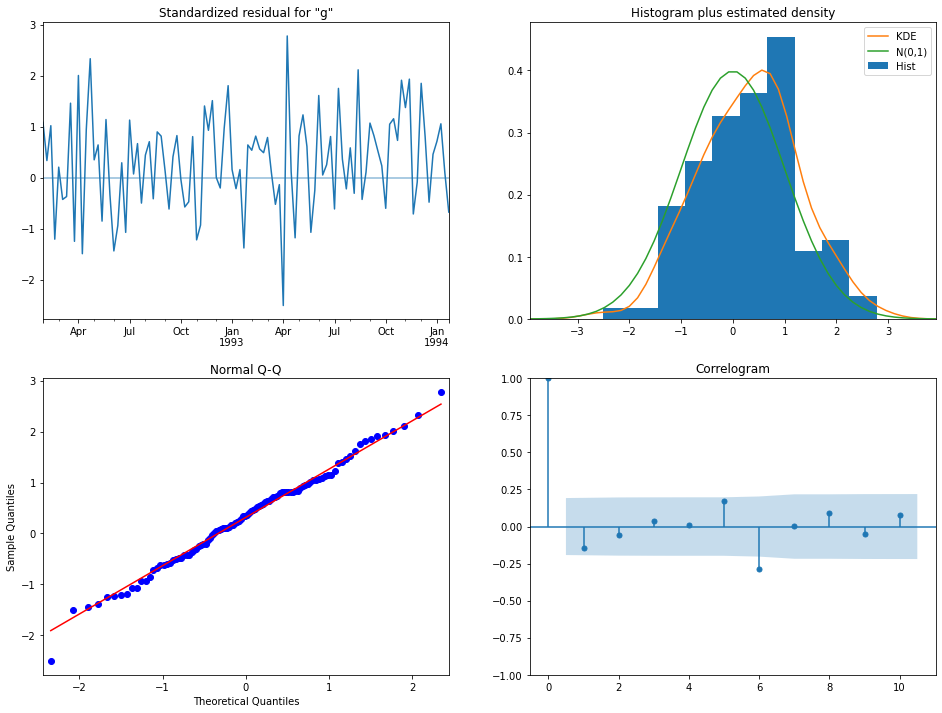

In [190]:
modelres.plot_diagnostics()
plt.show()

In [191]:
trainRes = modelres.predict(dynamic=False)

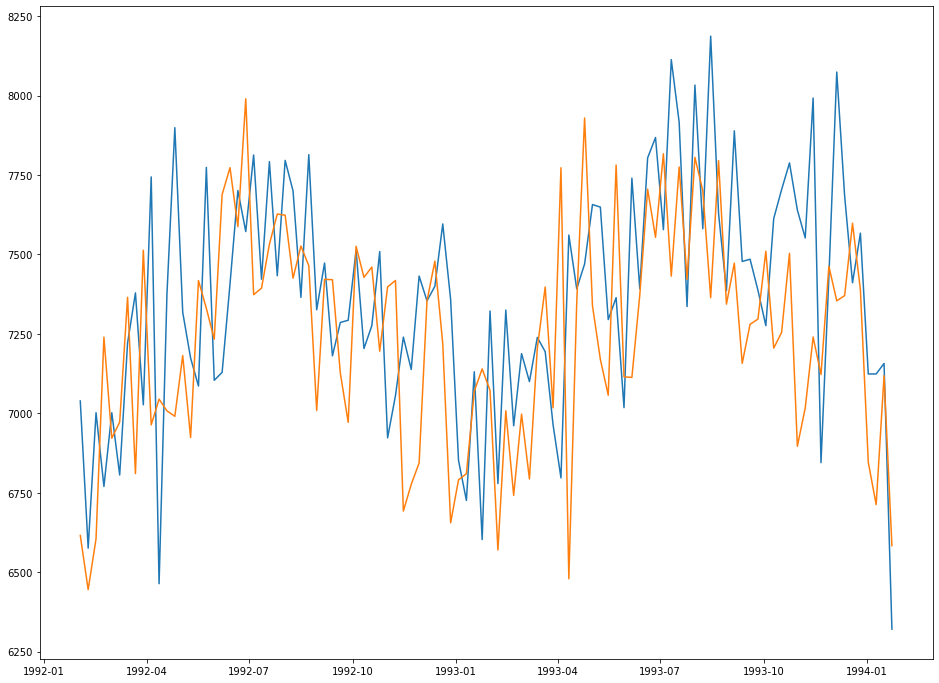

In [195]:
plt.plot(dataset['gasoline'][1*52:3*52])
plt.plot(trainRes[1*52:])

In [197]:
skm.mean_absolute_percentage_error(dataset['gasoline'][1*52:3*52], trainRes[1*52:])

0.04262516103807011

In [201]:
testRes = modelres.predict(start=3*52, end=(4*52)-1, dynamic=False)

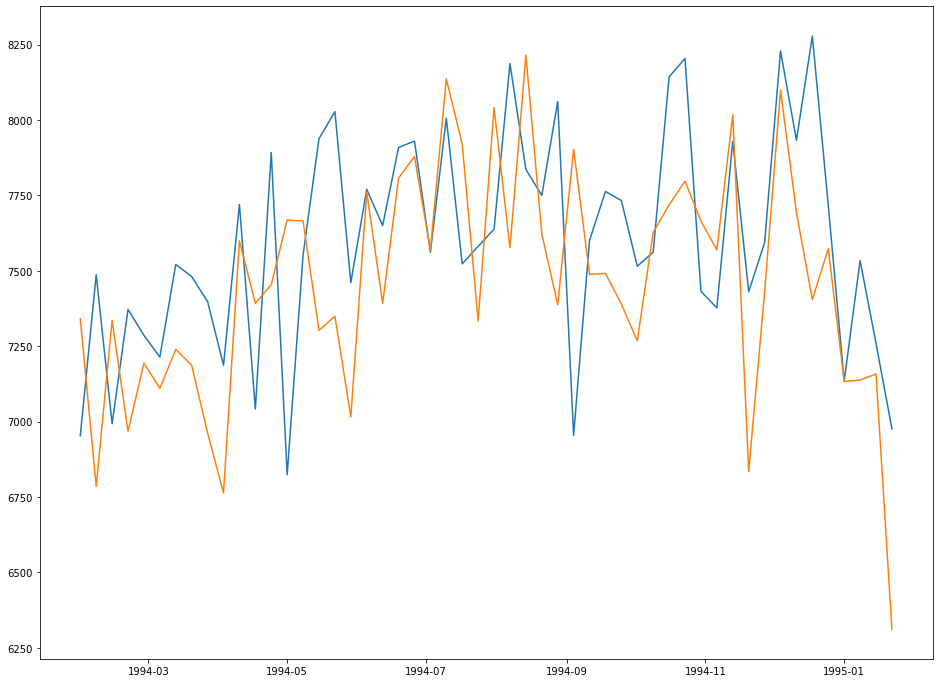

In [202]:
plt.plot(dataset['gasoline'][3*52:4*52])
plt.plot(testRes)

In [203]:
skm.mean_absolute_percentage_error(dataset['gasoline'][3*52:4*52], testRes)

0.04360510256394687

### Using Exogenous Variables

In [205]:
dataset.columns

Index(['gasoline', 'exog1', 'exog2'], dtype='object')

In [207]:
fit_res = pm.auto_arima(dataset['gasoline'][:3*52], X=dataset[['exog1','exog2']][:3*52], start_p=0, start_q=0, with_intercept=True,
                       test='adf', trace=True, stepwise=False, seasonal=True, out_of_sample_size=52,
                       scoring='mse', m=52)

 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2260.353, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=2311.060, Time=0.67 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=9.66 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=2293.729, Time=2.87 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=15.89 sec
 ARIMA(0,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=8.99 sec
 ARIMA(0,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=9.49 sec
 ARIMA(0,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=14.39 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2271.284, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2313.254, Time=0.75 sec
 ARIMA(0,0,1)(0,0,2)[52] intercept   : AIC=inf, Time=11.04 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=2284.477, Time=3.34 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=12.81 sec
 ARIMA(0,0,1)(2,0,0)[52] intercept  

In [208]:
bestparams = list(fit_res.order) + [fit_res.seasonal_order[-1]]

In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [210]:
model = SARIMAX(dataset['gasoline'][:3*52], exog=dataset[['exog1','exog2']][:3*52], 
                seasonal_order=bestparams)

In [211]:
modelres = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36998D+00    |proj g|=  4.52346D-02


 This problem is unconstrained.



At iterate    5    f=  7.36695D+00    |proj g|=  4.64321D-04

At iterate   10    f=  7.36694D+00    |proj g|=  5.87875D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10     12      1     0     0   5.879D-05   7.367D+00
  F =   7.3669434663696798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [212]:
modelres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                   gasoline   No. Observations:                  156
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2, 3], 52)   Log Likelihood               -1149.243
Date:                                    Sat, 11 Sep 2021   AIC                           2314.486
Time:                                            03:03:27   BIC                           2338.885
Sample:                                        02-03-1991   HQIC                          2324.396
                                             - 01-23-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog1        100.6133      0.895    112.445      0.000      98.860     102.367
exog2        -80.2516     61.628     -1.302      0.193    -201.041      40.538
ar.L1         -0.0109      0.096     -0.114      0.909      -0.199       0.177
ar.S.L52       0.0153   6.31e+04   2.43e-07      1.000   -1.24e+05    1.24e+05
ma.S.L52       0.0125   6.26e+04      2e-07      1.000   -1.23e+05    1.23e+05
ma.S.L104      0.1220   1660.950   7.35e-05      1.000   -3255.279    3255.524
ma.S.L156      0.0037   1.28e+04   2.87e-07      1.000    -2.5e+04     2.5e+04
sigma2      1.485e+05   5013.569     29.623      0.000    1.39e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.67
Prob(Q):                              0.94   Prob(JB):                         0.10
Heteroskedasticity (H):               1.41   Skew:                            -0.23
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+18. Standard errors may be unstable.
"""

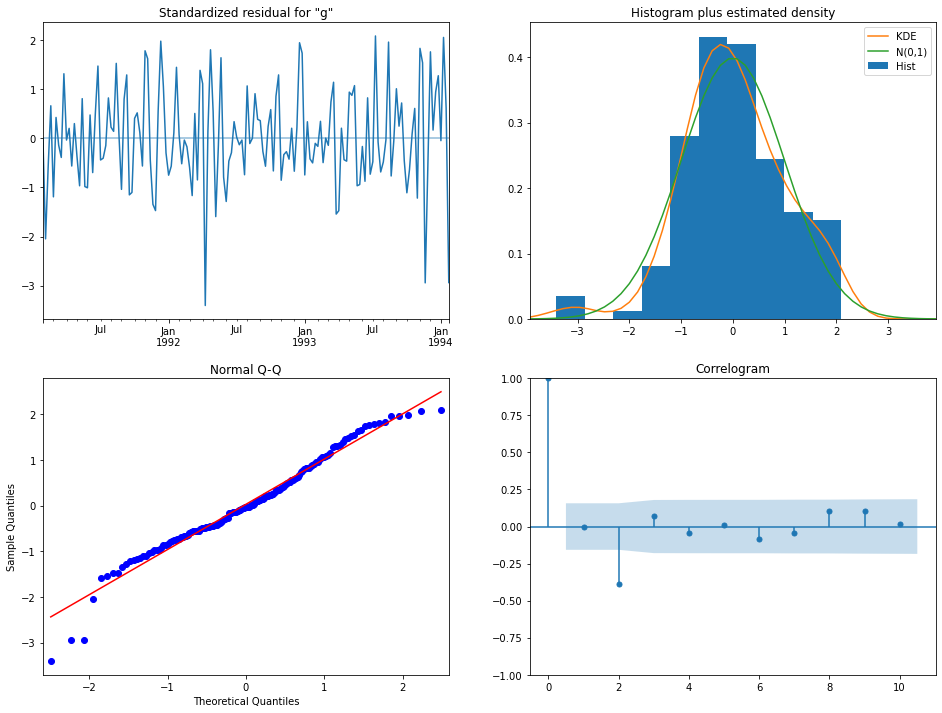

In [213]:
modelres.plot_diagnostics()
plt.show()

In [217]:
trainRes = modelres.predict(dynamic=False, exog=dataset[['exog1','exog2']][:3*52])

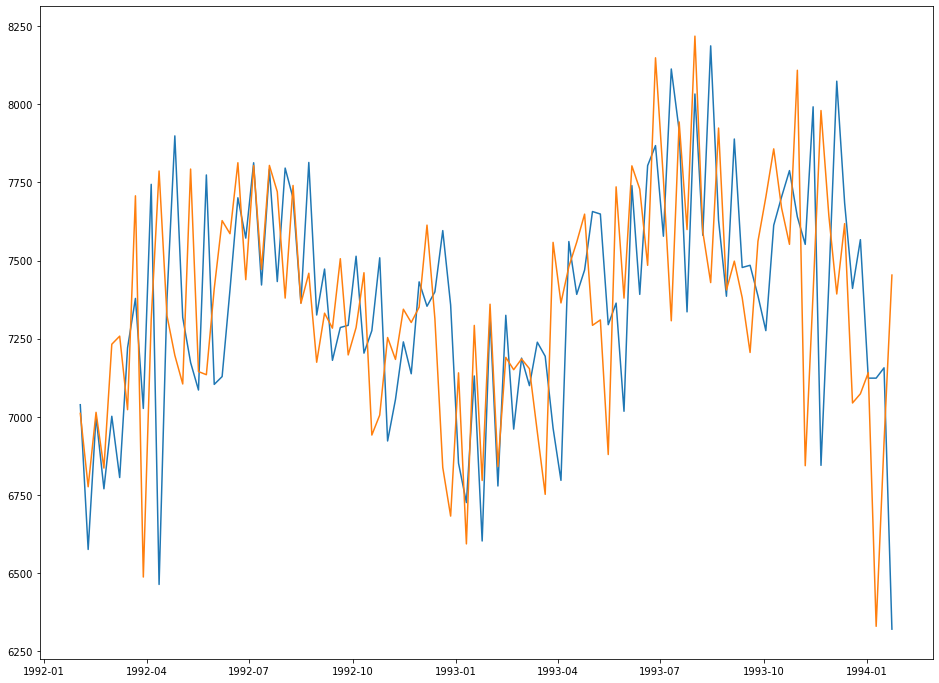

In [218]:
plt.plot(dataset['gasoline'][1*52:3*52])
plt.plot(trainRes[1*52:])

In [219]:
skm.mean_absolute_percentage_error(dataset['gasoline'][1*52:3*52], trainRes[1*52:])

0.04062771582407222

In [221]:
testRes = modelres.predict(start=3*52, end=(4*52)-1, 
                           exog=dataset[['exog1','exog2']][3*52:4*52], dynamic=False)

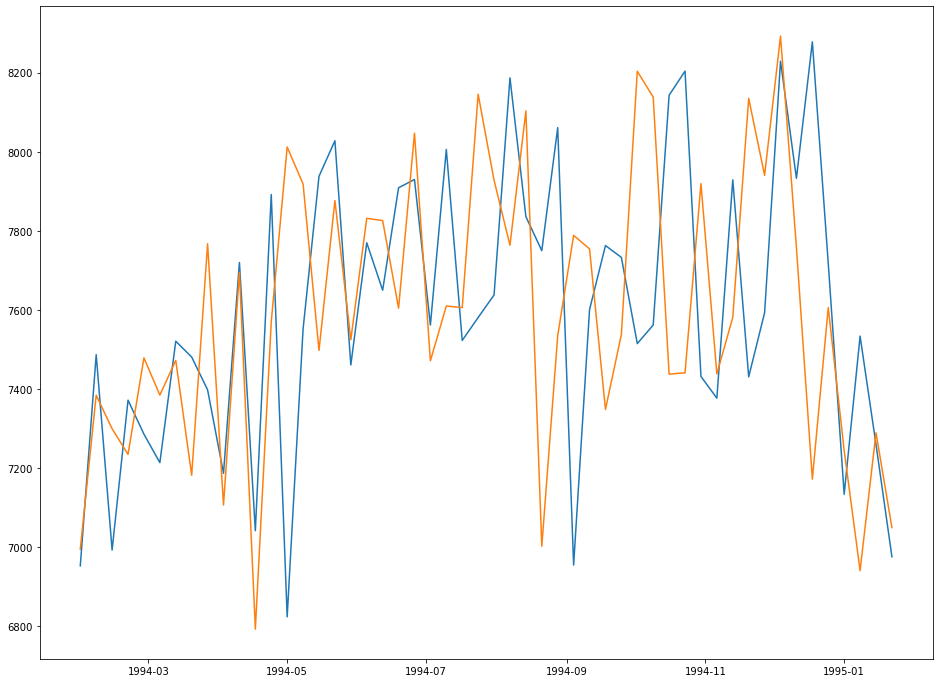

In [222]:
plt.plot(dataset['gasoline'][3*52:4*52])
plt.plot(testRes)

In [223]:
skm.mean_absolute_percentage_error(dataset['gasoline'][3*52:4*52], testRes)

0.043315656937495256

In [82]:
def estimate_exogenous_vars(exog, k=0, fill_val=0.0):
    """
    Generates distributed lags (DLs) for given exogenous variables.
    Args:
        exog: (pd.DataFrame) Dataframe containing the exogenous variables. If a list of lists or numpy array is provided, the 
    """
    ##k can be integer, dict with integer or list of lags eg:
    # k = 2 --> apply 0,1,2 lags to every variable
    # k = {'var1':2, 'var2':3, 'rest':1} --> apply 0,1,2 lags to var1, 0,1,2,3 lags to var2 and 0,1 lags to rest of the variables
    # k = {'var1':2, 'var2':[0,1,3], 'rest':1} apply 0,1,2 lags to var1, o,1,3 lags to var2 and 0,1 lags to rest of the variables
    ##fill_val can be either a float (0.0, np.nan, 1.0 etc) or np function (np.mean, np.median etc)
    if not isinstance(exog, pd.DataFrame):
        exog = pd.DataFrame(exog)
    
    final_exog = pd.DataFrame([])
    for var in exog.columns:
        if isinstance(k, int):
            tmp_k = k
        elif isinstance(k, dict):
            if var in k:
                tmp_k = k[var]
            else:
                tmp_k = k['rest']
        else:
            raise TypeError("k can only be of type integer or dict!")
        
        if isinstance(tmp_k, int):
            tmp_k = [*range(0, tmp_k+1)]
        
        for lag in tmp_k:
            final_exog[f'{var}_{lag}'] = exog[var].shift(lag, 
                                                         fill_value=fill_val if isinstance(fill_val, float) else fill_val(exog[var])
                                                        )
    return final_exog

In [90]:
estimate_exogenous_vars(dataset[['exog1', 'exog2']], k={'exog1': [0,1,4], 'exog2':2}, fill_val=0.0)

,exog1_0,exog1_1,exog1_4,exog2_0,exog2_1,exog2_2
1991-02-03,65.82,0.00,0.00,0.494168,0.000000,0.000000
1991-02-10,72.24,65.82,0.00,0.662214,0.494168,0.000000
1991-02-17,68.75,72.24,0.00,0.751519,0.662214,0.494168
1991-02-24,69.47,68.75,0.00,3.362673,0.751519,0.662214
1991-03-03,73.28,69.47,65.82,1.456247,3.362673,0.751519
...,...,...,...,...,...,...
2005-04-10,90.24,93.06,90.95,0.723931,1.852297,0.175486
2005-04-17,91.75,90.24,90.89,0.649899,0.723931,1.852297
2005-04-24,92.69,91.75,91.70,0.535477,0.649899,0.723931
2005-05-01,93.05,92.69,93.06,1.209181,0.535477,0.649899


In [69]:
dataset['exog1'].shift(1, fill_value=0)

1991-02-03     0.00
1991-02-10    65.82
1991-02-17    72.24
1991-02-24    68.75
1991-03-03    69.47
              ...  
2005-04-10    93.06
2005-04-17    90.24
2005-04-24    91.75
2005-05-01    92.69
2005-05-08    93.05
Freq: W-SUN, Name: exog1, Length: 745, dtype: float64

In [70]:
dataset['exog1']

1991-02-03    65.82
1991-02-10    72.24
1991-02-17    68.75
1991-02-24    69.47
1991-03-03    73.28
              ...  
2005-04-10    90.24
2005-04-17    91.75
2005-04-24    92.69
2005-05-01    93.05
2005-05-08    93.88
Freq: W-SUN, Name: exog1, Length: 745, dtype: float64

In [73]:
fill_val = np.mean

In [74]:
fill_val([1,2,3])

2.0